In [5]:
# Import Library yang Diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# Load dataset dari URL GitHub
from google.colab import drive
drive.mount('/content/drive')
file_url = "/content/drive/My Drive/DATASET/Dataset_Airquality/PRSA_Data_Guanyuan_20130301-20170228.csv"
df = pd.read_csv(file_url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# 1. Tampilkan Beberapa Baris Data
print("Menampilkan 5 baris pertama dari dataset:")
display(df.head())

Menampilkan 5 baris pertama dari dataset:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
# 2. Data Cleaning (Menangani Missing Values)
# Mengisi nilai yang hilang hanya pada kolom numerik
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)
# Mengisi nilai yang hilang pada kolom kategori dengan modus (nilai yang paling sering muncul)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [9]:
###  3. Eksplorasi Data
# Statistik Deskriptif
display(df.describe())

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.512914,108.778322,17.461290,57.771932,1252.731776,55.300104,13.585130,1011.846665,3.123449,0.067383,1.708373
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.281010,91.038393,23.466455,34.831577,1138.242638,56.530697,11.395866,10.401084,13.685001,0.909798,1.203846
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


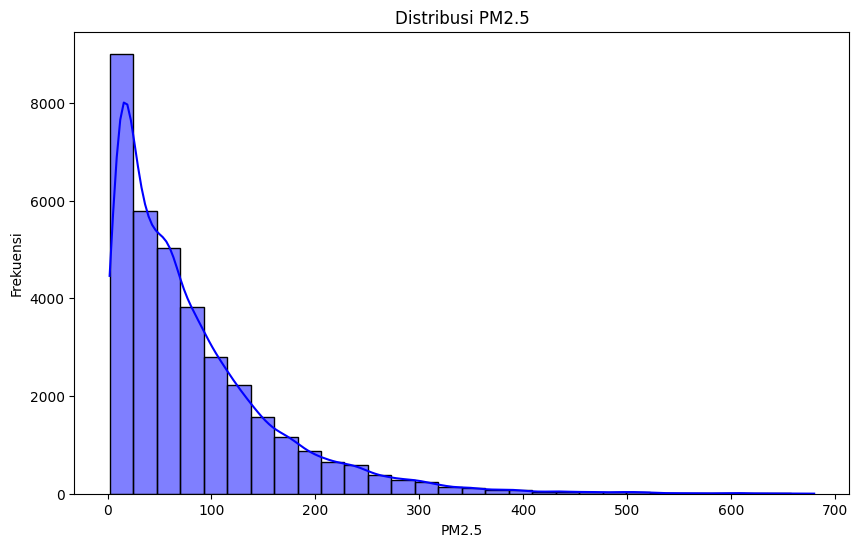

In [10]:
# Visualisasi Distribusi PM2.5
plt.figure(figsize=(10,6))
sns.histplot(df["PM2.5"], bins=30, kde=True, color='blue')
plt.title("Distribusi PM2.5")
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

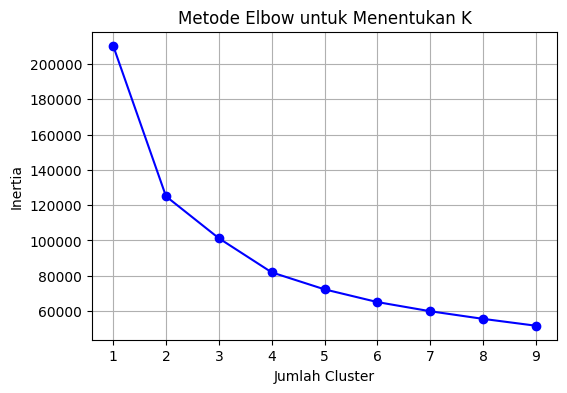

In [16]:
## 4.1. Normalisasi Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]])

# 4.2. Tentukan range jumlah cluster
K = range(1, 10)
distortions = []

# 4.3. Hitung inertia untuk setiap jumlah cluster
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

# 4.4. Plot Metode Elbow
plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.grid(True)
plt.show()

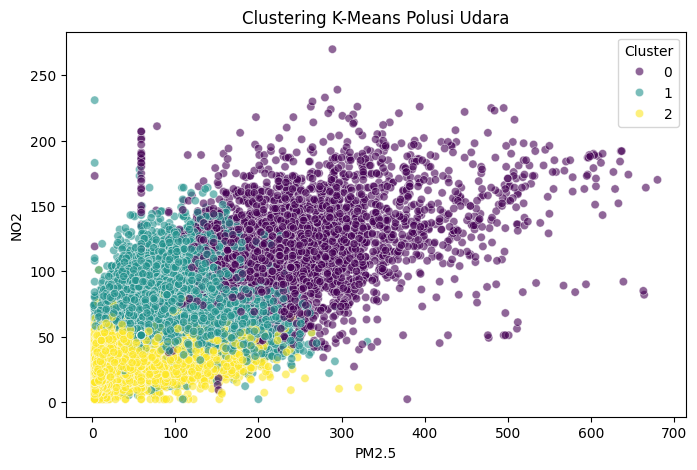

In [17]:
# 6. Clustering K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualisasi Clustering
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["PM2.5"], y=df["NO2"], hue=df["Cluster"], palette="viridis", alpha=0.6)
plt.title("Clustering K-Means Polusi Udara")
plt.show()

In [18]:
# 7. Simpan Hasil Clustering ke CSV
df.to_csv("hasil_clustering.csv", index=False)
print("Proses selesai! Hasil disimpan dalam hasil_clustering.csv")

Proses selesai! Hasil disimpan dalam hasil_clustering.csv


In [19]:
# 8. Kesimpulan
"""
1. Konsentrasi PM2.5 cenderung lebih tinggi di musim dingin.
2. K-Means mengelompokkan polusi menjadi 3 kategori: rendah, sedang, tinggi.
3. Elbow Method membantu menentukan jumlah cluster optimal.
4. Data telah dinormalisasi sebelum clustering untuk hasil yang lebih akurat.
"""

'\n1. Konsentrasi PM2.5 cenderung lebih tinggi di musim dingin.\n2. K-Means mengelompokkan polusi menjadi 3 kategori: rendah, sedang, tinggi.\n3. Elbow Method membantu menentukan jumlah cluster optimal.\n4. Data telah dinormalisasi sebelum clustering untuk hasil yang lebih akurat.\n'